Import necessary libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Accessing files stored in Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Paths to training, validation, and test folders
train_path = './drive/MyDrive/dataset/train'
validation_path = './drive/MyDrive/dataset/valid'
test_path = './drive/MyDrive/dataset/test'

batch_size = 16  #number of samples per batch during training
img_size = (224, 224)  #target size
num_classes = 30  #number of classes in the dataset

# Loading the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

# Adding my own layers
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=vgg_model.input, outputs=predictions)

# Data generator for the training set with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Data generator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(directory=validation_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')

# Data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(directory=test_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10 #number of epochs for training

# Early stopping criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Training the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    epochs=epochs,
                    callbacks=[early_stopping])

# Evaluation of the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy:", test_acc)

Found 3615 images belonging to 30 classes.
Found 150 images belonging to 30 classes.
Found 150 images belonging to 30 classes.
Epoch 1/10
226/226 [==============================] - 63s 246ms/step - loss: 1.3701 - accuracy: 0.6517 - val_loss: 0.3119 - val_accuracy: 0.9000
Epoch 2/10
226/226 [==============================] - 55s 245ms/step - loss: 0.5651 - accuracy: 0.8290 - val_loss: 0.2456 - val_accuracy: 0.9267
Epoch 3/10
226/226 [==============================] - 54s 238ms/step - loss: 0.3582 - accuracy: 0.8869 - val_loss: 0.2816 - val_accuracy: 0.9000
Epoch 4/10
226/226 [==============================] - 54s 237ms/step - loss: 0.3140 - accuracy: 0.9035 - val_loss: 0.2354 - val_accuracy: 0.9133
Epoch 5/10
226/226 [==============================] - 53s 236ms/step - loss: 0.2360 - accuracy: 0.9278 - val_loss: 0.1128 - val_accuracy: 0.9667
Epoch 6/10
226/226 [==============================] - 54s 237ms/step - loss: 0.2093 - accuracy: 0.9331 - val_loss: 0.1974 - val_accuracy: 0.9533
Epo

In [5]:
model.save("project_model.h5")

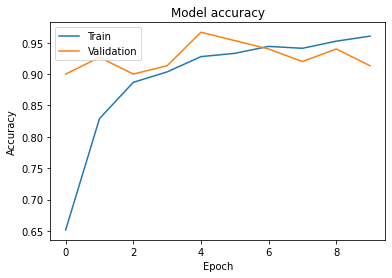

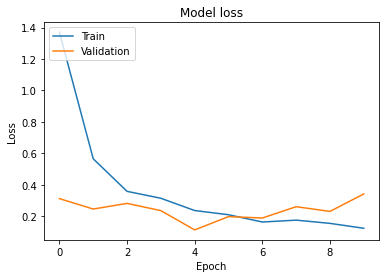

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy as a function of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss as a function of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 83ms/step
Image: ./drive/MyDrive/dataset/train/golf ball/001.jpg
Predicted class: golf ball with confidence score: 1.00


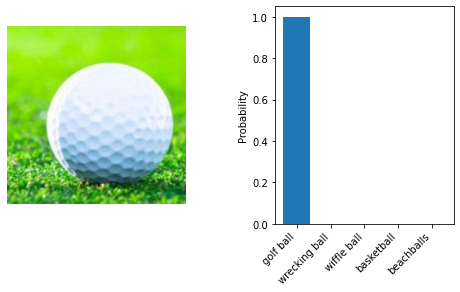

1/1 [==============================] - 0s 32ms/step
Image: ./drive/MyDrive/dataset/train/paint balls/28.jpg
Predicted class: paint balls with confidence score: 1.00


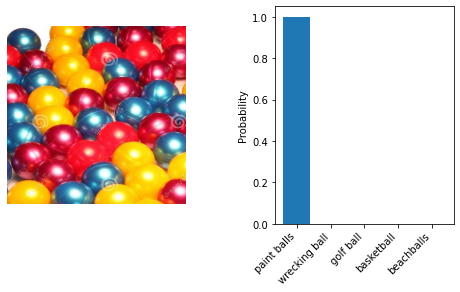

1/1 [==============================] - 0s 28ms/step
Image: ./drive/MyDrive/dataset/AmericanFootball.jpg
Predicted class: football with confidence score: 1.00


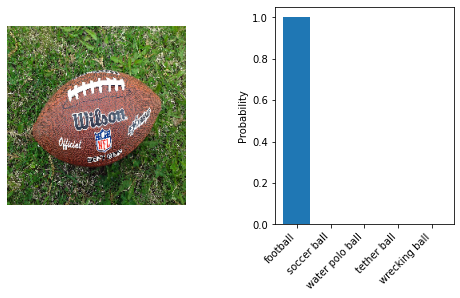

1/1 [==============================] - 0s 31ms/step
Image: ./drive/MyDrive/dataset/football.jpg
Predicted class: soccer ball with confidence score: 1.00


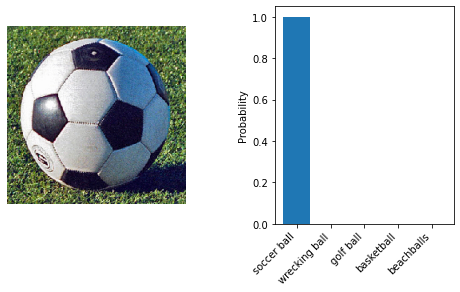

1/1 [==============================] - 0s 28ms/step
Image: ./drive/MyDrive/dataset/basketball2.jpg
Predicted class: basketball with confidence score: 1.00


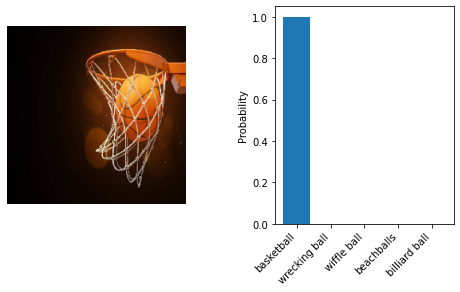

1/1 [==============================] - 0s 28ms/step
Image: ./drive/MyDrive/dataset/pokeballs.jpg
Predicted class: pokeman balls with confidence score: 1.00


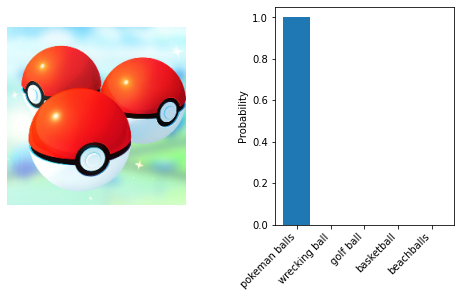

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Paths to the images
image_paths = ['./drive/MyDrive/dataset/train/golf ball/001.jpg', 
               './drive/MyDrive/dataset/train/paint balls/28.jpg',
               # starting from this showing on the images that are not in the dataset, but from internet
               './drive/MyDrive/dataset/AmericanFootball.jpg', 
               './drive/MyDrive/dataset/football.jpg',
               './drive/MyDrive/dataset/basketball2.jpg',
               './drive/MyDrive/dataset/pokeballs.jpg',]

# Make predictions for each image
for image_path in image_paths:
    # Loading the image
    img = image.load_img(image_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Making the prediction
    preds = model.predict(x)
    predicted_class = np.argmax(preds)
    top_5_preds = np.argsort(preds[0])[::-1][:5] #top 5 predicted classes
    top_5_probs = preds[0][top_5_preds] #probabilities of them

    # Print the predicted class and its confidence
    class_label = list(train_generator.class_indices.keys())[predicted_class]
    confidence = top_5_probs[0]
    print(f'Image: {image_path}\nPredicted class: {class_label} with confidence score: {confidence:.2f}')

    # Plot the image and the prediction
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
    ax1.imshow(img)
    ax1.axis('off')
    ax2.bar(range(5), top_5_probs)
    ax2.set_xticks(range(5))
    ax2.set_xticklabels([list(train_generator.class_indices.keys())[i] for i in top_5_preds], rotation=45, ha='right')
    ax2.set_ylabel('Probability')
    plt.subplots_adjust(wspace=0.5)
    plt.show()

In [8]:
!ls -lha

total 130M
drwxr-xr-x 1 root root 4.0K Feb 18 14:59 .
drwxr-xr-x 1 root root 4.0K Feb 18 14:35 ..
drwxr-xr-x 4 root root 4.0K Feb 17 19:29 .config
drwx------ 5 root root 4.0K Feb 18 14:38 drive
-rw-r--r-- 1 root root 130M Feb 18 18:25 project_model.h5
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data


In [9]:
from google.colab import files
files.download("/content/project_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>